In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns

from google.colab import drive
import os

UsageError: unrecognized arguments: # <- make sure the plotted figure saved in the Notebook


In [2]:
drive.mount('/content/drive')
print(os.getcwd())
os.chdir(os.getcwd() + '/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive
/content


# 1. Data Processing

In [3]:
df = pd.read_csv('datasets/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 2. Data Preparing
- Label-Encoding data (converting from categorical data to numberical)
- Renaming data's columns

In [5]:
df.rename(columns={
    'Gender' : 'gender',
    'Age' : 'age',
    'Annual Income (k$)' : 'annual_income',
    'Spending Score (1-100)' : 'spending_score'
}, inplace=True)

le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Male', 'Female'])
df['gender'] = le_gender.transform(df['gender'])

df

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# 3. Unsupervised Learning
## Looking for the best K Value
With Elbow method

In [6]:
X = df.drop(['CustomerID', 'gender'], axis=1)

clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

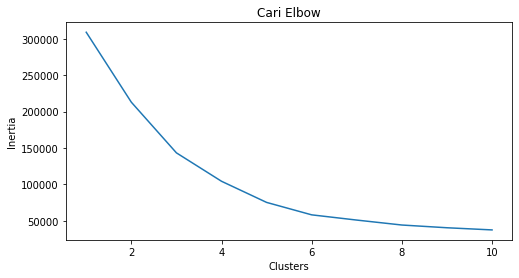

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Below is the same graph but just with different approach

Text(0.5, 1.0, 'Elbow Find')

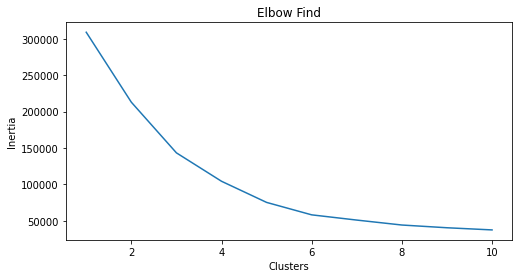

In [12]:
plt.figure(figsize=(8,4))
plt.plot(list(range(1,11)), clusters)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Find')

## Modelling K-Means with 5 clusters
and add the labels to the data

In [19]:
km5 = KMeans(n_clusters=5).fit(X)

X['label'] = km5.labels_

X

,age,annual_income,spending_score,label,labels
0,19,15,39,0,3
1,21,15,81,2,1
2,20,16,6,0,3
3,23,16,77,2,1
4,31,17,40,0,3
...,...,...,...,...,...
195,35,120,79,3,2
196,45,126,28,1,4
197,32,126,74,3,2
198,32,137,18,1,4


## Creating plot K-Means with 5 Clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


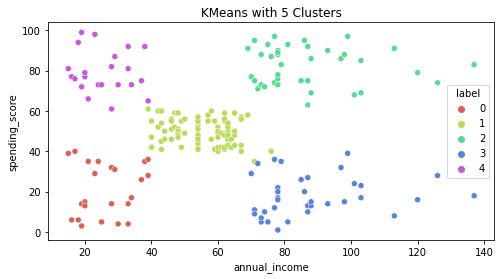

In [18]:
plt.figure(figsize=(8, 4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['label'],
                palette = sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()